In [ ]:
# Necessary libraries to import
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Model Selection
from sklearn.model_selection import train_test_split, 

# Regression Models
from sklearn.linear_model import LinearRegression, ElasticNet

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, f1_score,
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)

# Pipelines
from sklearn.pipeline import Pipeline


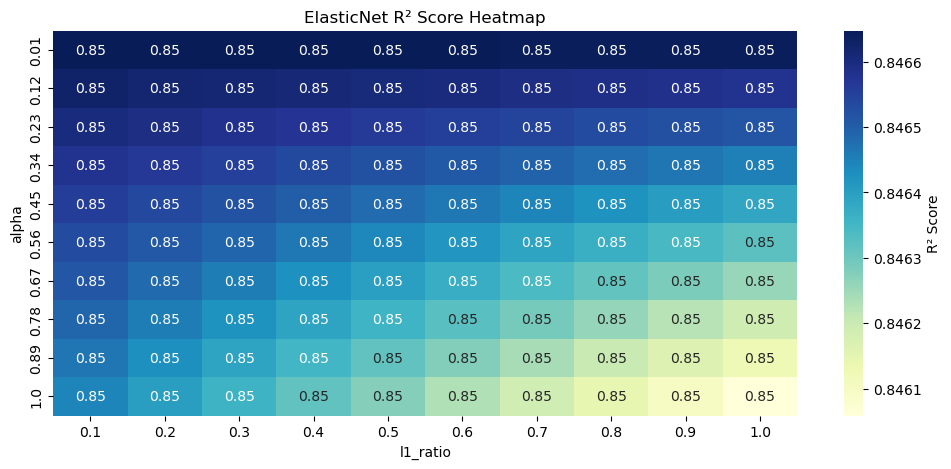

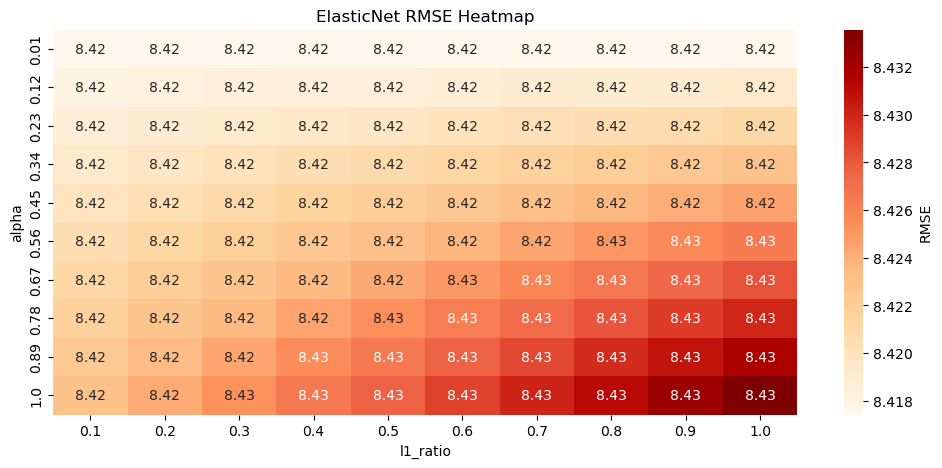

Top-performing configuration based on R²:
Alpha: 0.01, L1 Ratio: 0.1
R² Score: 0.8466, RMSE: 8.4174


In [ ]:
# Part 3: Build and Evaluate Models 
# 1.Regression Models 

# Generate synthetic dataset to simulate cholesterol data
np.random.seed(42)
n_samples = 200
X = np.random.rand(n_samples, 3) * 100  # Simulate features like age, BMI, etc.
true_coefs = [0.3, 0.5, 0.2]
y = 120 + X @ true_coefs + np.random.randn(n_samples) * 10  # cholesterol levels with noise

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
alphas = np.linspace(0.01, 1.0, 10)
l1_ratios = np.linspace(0.1, 1.0, 10)

# Store results
results_r2 = np.zeros((len(alphas), len(l1_ratios)))
results_rmse = np.zeros((len(alphas), len(l1_ratios)))

# Run models across parameter grid
for i, alpha in enumerate(alphas):
    for j, l1_ratio in enumerate(l1_ratios):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        results_r2[i, j] = r2
        results_rmse[i, j] = rmse

# Convert results to DataFrames for heatmap
r2_df = pd.DataFrame(results_r2, index=np.round(alphas, 2), columns=np.round(l1_ratios, 2))
rmse_df = pd.DataFrame(results_rmse, index=np.round(alphas, 2), columns=np.round(l1_ratios, 2))

# Plot R² heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(r2_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'R² Score'})
plt.title('ElasticNet R² Score Heatmap')
plt.xlabel('l1_ratio')
plt.ylabel('alpha')
plt.show()

# Plot RMSE heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(rmse_df, annot=True, fmt=".2f", cmap="OrRd", cbar_kws={'label': 'RMSE'})
plt.title('ElasticNet RMSE Heatmap')
plt.xlabel('l1_ratio')
plt.ylabel('alpha')
plt.show()

# Identify top-performing configuration
best_idx = np.unravel_index(np.argmax(results_r2), results_r2.shape)
best_alpha = alphas[best_idx[0]]
best_l1_ratio = l1_ratios[best_idx[1]]

print(f"Top-performing configuration based on R²:")
print(f"Alpha: {best_alpha}, L1 Ratio: {best_l1_ratio}")
print(f"R² Score: {results_r2[best_idx]:.4f}, RMSE: {results_rmse[best_idx]:.4f}")


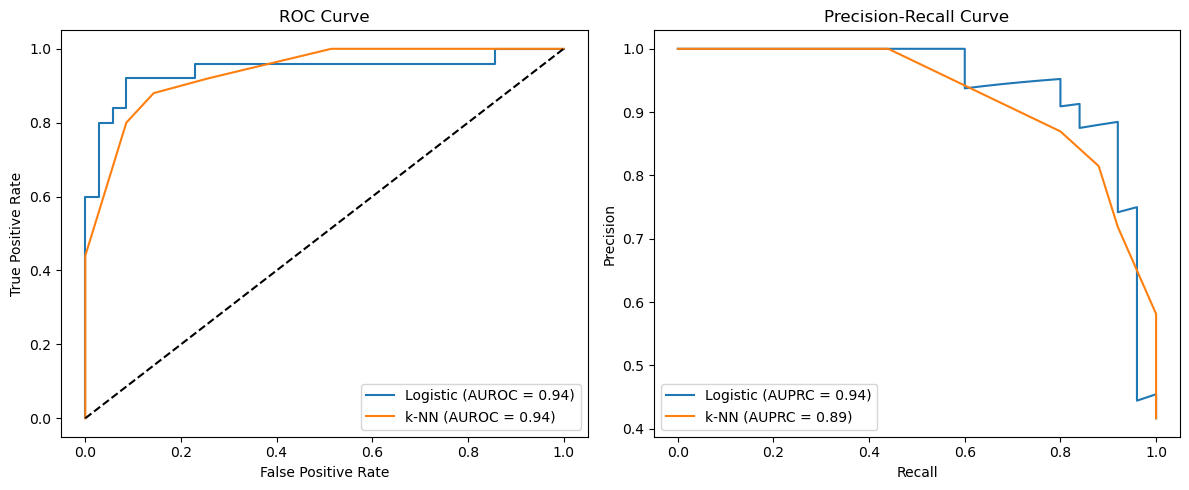

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    average_precision_score, roc_curve, precision_recall_curve
)

# Load the dataset
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Machine Learning AI Bioinforma Banner\BINF-5507-MACHINE-LEARNING-AI-\Assignment2\Data\heart_disease_uci(1).csv")

# Cleaning column names )
data.columns = [col.strip().lower().replace(" ", "_") for col in data.columns]

# Assuming 'num' is the target variable indicating presence of heart disease
new_num = []
for value in data['num']:
    if value > 0:
        new_num.append(1)
    else:
        new_num.append(0)
data['num'] = new_num

# 4. Dropping rows with any missing values
data = data.dropna()

# 5.Creating features (X) and target (y)
X = data.drop(columns=['num'])
y = data['num']

# 6. One-hot encoding categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# 7. Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 8. Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9. Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]

# 10. k-NN Model (with 5 neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]

# 11. Get scores
log_auc = roc_auc_score(y_test, log_probs)
log_ap = average_precision_score(y_test, log_probs)

knn_auc = roc_auc_score(y_test, knn_probs)
knn_ap = average_precision_score(y_test, knn_probs)

# 12. Plot ROC and PR curves
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)

prec_log, rec_log, _ = precision_recall_curve(y_test, log_probs)
prec_knn, rec_knn, _ = precision_recall_curve(y_test, knn_probs)

plt.figure(figsize=(12, 5))

# ROC Curves
plt.subplot(1, 2, 1)
plt.plot(fpr_log, tpr_log, label=f'Logistic (AUROC = {log_auc:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUROC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curves
plt.subplot(1, 2, 2)
plt.plot(rec_log, prec_log, label=f'Logistic (AUPRC = {log_ap:.2f})')
plt.plot(rec_knn, prec_knn, label=f'k-NN (AUPRC = {knn_ap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()
